In [1]:
!pip install fastai==1.0.52
from fastai.text import *

     |████████████████████████████████| 225kB 2.7MB/s 
  Found existing installation: fastai 1.0.57
    Uninstalling fastai-1.0.57:
      Successfully uninstalled fastai-1.0.57


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
aa2=path/'Thesis Data'/'AA dataset'
char=path/'Thesis Data'/'char-ulm'
wiki_data = path/'Thesis Data'/'wiki_data'/'Wiki'

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  return final_preds,targets

### LM

In [0]:
bs = 32
bptt = 70
vocab = " !\"#$%&'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”‪™−√∝∞"

In [0]:
class NewTokenizer(BaseTokenizer):
    def tokenizer(self,t):
      return [BOS]+[i for i in t]

In [0]:
itos = [UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP] + [i for i in vocab]

In [0]:
vocab=Vocab(itos)
tokenizer=Tokenizer(NewTokenizer, pre_rules=[], post_rules=[])

In [9]:
len(itos)

188

## Our AA

#### Our AA (LM)

In [0]:
data_lm_AA = load_data(aa, 'train_AA_char_lm.pkl',bs=bs)

In [0]:
data_lm_AA.show_batch()

idx,text
0,"চ া খ া ব ি ? শ া ম া ব ল ল , হ ্ য া xxunk xxunk আ য় ত ো র ব া ব া র স ঙ ্ গ ে চ া খ া xxunk ত ো র ব া"
1,"য় xxunk ন দ ী র ঘ া ট থ ে ক ে ও xxunk ত ু ম ি য া ও xxunk আ ম ি ব ল ি ল া ম , ত ো ম া ক ে ন ি য় ে ই য া ব xxunk"
2,"ব ি দ ঘ ু ট ে চ ে হ া র া , ক ি ন ্ ত ু ক ী xxunk ব া হ া র ে র স া জ প র ি য ় ে ছ ে ত া দ ে র xxunk হ া ত ি র প ি"
3,ক ি আ জ ও ব ু ঝ ত ে প া র ন ি ! দ ে ব দ া স দ ে য় া ল ে র দ ি ক ে চ া হ ি য় া ছ ি ল xxunk স ে ই দ ি
4,"আ ম া র ভ া ড় া ন া ক ি ম া ফ xxunk অ ন ্ য এ ক ক ্ র ু দ ্ ধ য া ত ্ র ী ব ল ল , হ া র া ম জ া দ া র ে"


In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki_data/'models'/'wiki_char_15');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


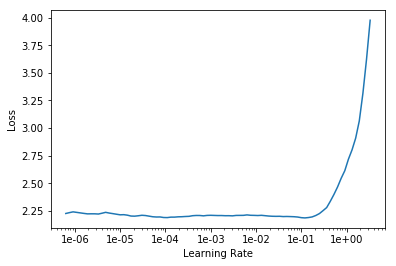

In [0]:
learn.lr_find();
learn.recorder.plot();

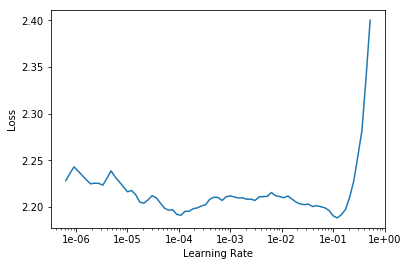

In [0]:
learn.recorder.plot(skip_end=15);

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('AA_wiki_char_lm_head');

epoch,train_loss,valid_loss,accuracy,time
0,1.660290,1.611292,0.531268,1:38:37
1,1.662974,1.605063,0.533370,1:38:24


In [0]:
learn.load('AA_wiki_char_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_1');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_1')

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,1.281666,1.252441,0.628051,1:51:22


In [0]:
learn.load('AA_wiki_char_lm_body_2');
learn.freeze_to(-3)
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,1.274423,1.240517,0.631535,1:43:16


In [0]:
learn.load('AA_wiki_char_lm_body_3');
learn.unfreeze()
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,1.288384,1.232775,0.633886,1:53:57


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_5')

epoch,train_loss,valid_loss,accuracy,time
0,1.253038,1.228566,0.634978,1:54:22


In [0]:
learn.load('AA_wiki_char_lm_body_5')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_6')

epoch,train_loss,valid_loss,accuracy,time
0,1.286328,1.226164,0.635704,2:00:18


In [0]:
learn.load('AA_wiki_char_lm_body_6')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_7')

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_8')

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_9')

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_10')

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('AA_wiki_char_lm_body_10')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_11')

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('AA_wiki_char_lm_body_11')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_12')

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('AA_wiki_char_lm_body_12')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_13')

epoch,train_loss,valid_loss,accuracy,time
0,1.276023,1.214684,0.638957,1:52:23


In [0]:
learn.load('AA_wiki_char_lm_body_13')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_14')

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('AA_wiki_char_lm_body_14')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_15')

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('AA_wiki_char_lm_body_15')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_16')

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('AA_wiki_char_lm_body_16')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_wiki_char_lm_body_17')

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,1.257307,1.212007,0.639729,2:03:44


In [0]:
learn.load('AA_wiki_char_lm_body_17')
learn.save_encoder('AA_wiki_char_lm_enc')

#### Classifier (our AA)

In [0]:
data_clas = load_data(aa, 'AA_char_clas.pkl',bs=bs)
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn_cls.load_encoder('AA_wiki_char_lm_enc')

In [0]:
data_clas.show_batch()

text,target
"xxbos x x b o s এ ক ন া প ি ত া ন ী আ স ি ল xxunk ন া প ি ত া ন ী স ধ ব া , খ া ট ো র া ঙ ্ গ া প ে ড় ে স া ড় ী প র",bongkim
"xxbos x x b o s ই xxunk র া জ ! আ ম া ক ে চ র ণ ে র া খ ি ও , আ ম ি ত ো ম া ক ে প ্ র ণ া ম ক র ি xxunk ২ ৩ | |",bongkim
xxbos x x b o s প া দ ক ্ র ো শ ভ ূ ম ি উ চ ্ চ প া ষ া ণ - প ্ র া চ ী র ব ে ষ ্ ট ি ত xxunk প ূ র ্ ব দ ি ক ে প ্ র শ,shordindu
xxbos x x b o s ও স xxunk ব া দ প ত ্ র ে র ব ্ য ব চ ্ ছ ে দ ক র ি ত ে ছ ি ল া ম xxunk গ ত ত ি ন ম া স এ ক ে ব া র ে,shordindu
xxbos x x b o s ক া ট ি ল xxunk ত া র প র স হ স া এ ই ক ু ণ ্ ঠ ি ত ন ী র ব ত া ভ ে দ ক র ি য় া ম ন ্ ত ্ xxunk গ ৃ,shordindu


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


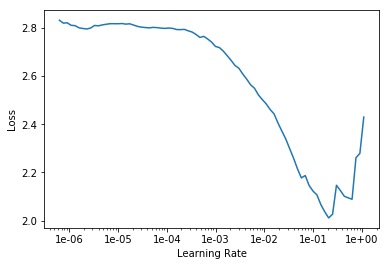

In [0]:
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('wiki_char_cls_1')

epoch,train_loss,valid_loss,accuracy,time
0,0.450973,0.213073,0.933217,51:08
1,0.260642,0.174089,0.948870,50:47


In [0]:
learn_cls.load('wiki_char_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('wiki_char_cls_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.240815,0.130392,0.961739,52:36
1,0.118510,0.084766,0.978783,52:52


In [0]:
learn_cls.load('wiki_char_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn_cls.save('wiki_char_cls_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.082395,0.077678,0.980174,59:56
1,0.053689,0.069194,0.982609,59:58


In [0]:
learn_cls.load('wiki_char_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('wiki_char_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.042338,0.064996,0.986087,1:07:21
1,0.034642,0.066909,0.984000,1:08:01


In [0]:
learn_cls.load('wiki_char_cls_4')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('wiki_char_cls_5')

epoch,train_loss,valid_loss,accuracy,time
0,0.041303,0.059174,0.987478,1:08:16
1,0.024010,0.059205,0.986783,1:08:45


In [0]:
learn_cls.load('wiki_char_cls_5');

In [12]:
pred,targ = testing(aa/'OurDataset_test.csv')

3592
Accuracy: 
0.9858017817371938
[('shunil_gongopaddhay', 'shirshendu'), ('shunil_gongopaddhay', 'toslima_nasrin'), ('shottojit_roy', 'shirshendu'), ('humayun_ahmed', 'MZI'), ('shordindu', 'nazrul'), ('manik_bandhopaddhay', 'humayun_ahmed'), ('humayun_ahmed', 'MZI'), ('zahir_rayhan', 'tarashonkor'), ('manik_bandhopaddhay', 'nazrul'), ('shottojit_roy', 'shirshendu'), ('tarashonkor', 'humayun_ahmed'), ('shunil_gongopaddhay', 'shomresh'), ('shunil_gongopaddhay', 'shomresh'), ('robindronath', 'tarashonkor'), ('bongkim', 'robindronath'), ('shordindu', 'bongkim'), ('shirshendu', 'shordindu'), ('tarashonkor', 'shorotchandra'), ('shordindu', 'bongkim'), ('toslima_nasrin', 'humayun_ahmed'), ('manik_bandhopaddhay', 'humayun_ahmed'), ('shunil_gongopaddhay', 'shorotchandra'), ('toslima_nasrin', 'humayun_ahmed'), ('robindronath', 'shorotchandra'), ('shunil_gongopaddhay', 'zahir_rayhan'), ('nazrul', 'robindronath'), ('nihar_ronjon_gupta', 'shunil_gongopaddhay'), ('tarashonkor', 'shorotchandra'), (

In [13]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average='weighted')
out

0.9857786169595948

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(targ, pred)
print(cm)

[[220   0   0   0 ...   0   0   0   0]
 [  0 111   0   0 ...   0   0   0   0]
 [  2   0 904   0 ...   0   0   0   0]
 [  1   0   2  86 ...   0   1   0   0]
 ...
 [  0   0   0   0 ... 386   0   1   1]
 [  0   0   2   1 ...   0 148   0   0]
 [  0   1   2   0 ...   0   0 183   0]
 [  0   0   0   0 ...   0   1   0  36]]


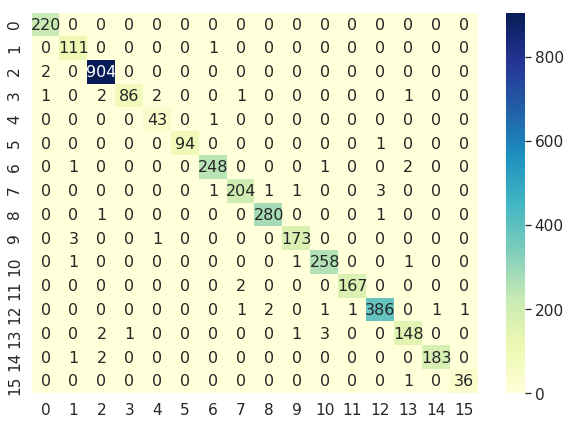

In [15]:
import seaborn as sn

df_cm = pd.DataFrame(cm, range(16),range(16))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',cmap="YlGnBu")# font size

import matplotlib.pyplot as plt
plt.savefig('wiki_character_AA.eps')

In [0]:
from google.colab import files
files.download('wiki_character_AA.eps')